In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import math

# Load data

In [86]:
path = "/content/drive/MyDrive/ML/Final_Project/1. data_raw/"
data = pd.DataFrame()
for file in os.listdir(path):
    df = pd.read_excel(path+file)
    data = pd.concat([data, df])

In [87]:
data

,Rate,Review,Label
0,9.0,Khu ẩm thực với đa dạng đồ lại còn bày trí đẹp...,1
1,9.0,Lúc nào đến aeon là lúc đấy phải tống một đống...,1
2,10.0,Bánh ngon lại rẻ chê đâu được gần hết các loại...,1
3,9.0,Ngon rẻ,1
4,"9,6",Tôi sắp chết vì ngập trong sushi mấttttt Lên h...,1
...,...,...,...
3372,2.8,"Mình gọi 3 phần như hình, cơm trộn, tobokki, c...",-1
3373,6.0,Vị trí dễ tìm\nNhân viên bình thường\nĐồ ăn kh...,-1
3374,5.0,Mình tìm quán này trên Foody thầy cmt nói khá ...,-1
3375,6.2,Mình với mấy đứa bạn vừa thi xong là phi ra ng...,-1


In [5]:
data.isna().sum()

Rate      0
Review    0
Label     0
dtype: int64

# Trực quan hóa

## 1. Thống kê lớp

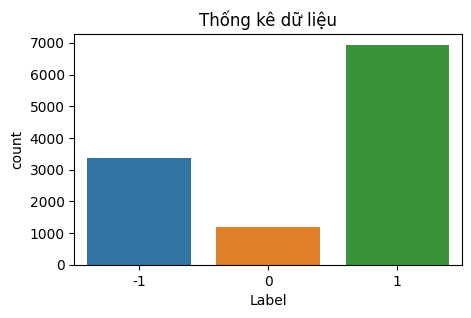

In [88]:
plt.figure(figsize=(5,3))
sb.countplot(data=data, x="Label").set_title('Thống kê dữ liệu')
plt.show()

## 2. Thống kê từ trước khi tiền xử lí

In [89]:
def sentence_len(text):
  return len(text.split(' '));

df_len_headline = data["Review"].apply(lambda text: sentence_len(text))
print('Độ dài trung bình của bình luận trong bộ dữ liệu:', int(np.mean(df_len_headline)), 'từ')

Độ dài trung bình của bình luận trong bộ dữ liệu: 69 từ


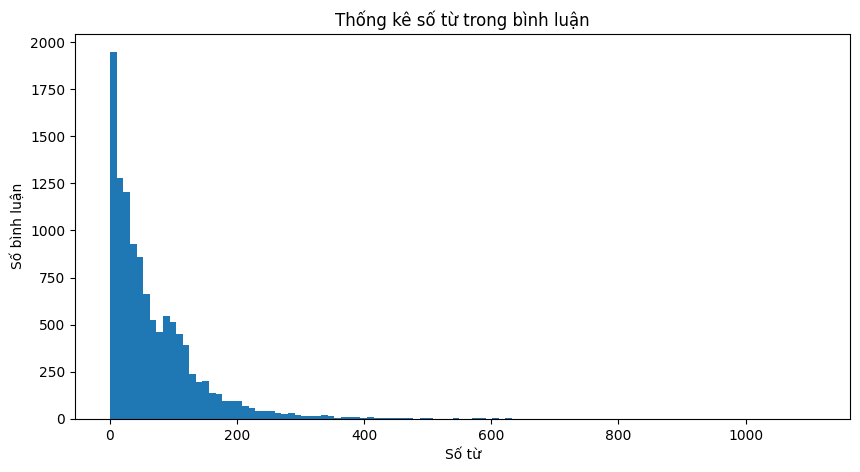

In [90]:
plt.figure(figsize=(10, 5))
plt.title("Thống kê số từ trong bình luận")
plt.xlabel('Số từ')
plt.ylabel('Số bình luận')
plt.hist(np.array(df_len_headline), bins=int(math.sqrt(len(df_len_headline))));

# Tiền xử lí

In [ ]:
!pip install underthesea

In [19]:
import regex as re
import underthesea

## 1. Xóa HTML tag

In [8]:
def remove_html(text):
  return re.sub(r'<[^>]*>', '', text)

print(remove_html("<h1>Title</h1>"))

Title


## 2. Đánh dấu spam URL

In [9]:
def check_url(text):
    pattern = re.compile(r'(http|https)://[^\s]+')
    match = pattern.search(text)
    if match:
        return True
    else:
        return False

In [10]:
data.drop(data[data['Review'].apply(check_url)].index, inplace=True)
data.shape

(11488, 3)

## 3. Chuẩn hóa dấu câu

In [11]:
from underthesea import text_normalize
def convert_unicode(txt):
  return text_normalize(txt)

print(convert_unicode("Ðảm baỏ chất lựơng phòng thí nghịêm hoá học"))

Đảm bảo chất lượng phòng thí nghiệm hóa học


## 4. Đưa về dạng viết thường

In [12]:
def to_lower_case(sentence):
    sentence = sentence.lower()
    return sentence

print(to_lower_case('Tôi là dân IT!'))

tôi là dân it!


## 5. Xóa các ký tự không cần thiết

In [22]:
def remove_unnecessary_charactor(document):
    # xóa các ký tự đặc biệt, emoji
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa kí tự chứa số
    document = re.sub(r'\w*\d\w*', '', document).strip()
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

document = 'Biết 1505 là gì không? 😆'
remove_unnecessary_charactor(document)

'Biết l à gì không'

## 6. Tách từ tiếng Việt

In [14]:
from underthesea import word_tokenize

sentence = 'Xin chào, rất vui được làm quen, tôi đến từ đất nước Việt Nam!'
print(word_tokenize(sentence))
print(word_tokenize(sentence, format='text'))

['Xin', 'chào', ',', 'rất', 'vui', 'được', 'làm quen', ',', 'tôi', 'đến', 'từ', 'đất nước', 'Việt Nam', '!']
Xin chào , rất vui được làm_quen , tôi đến từ đất_nước Việt_Nam !


## 7. Chuẩn hóa những từ lặp âm tiết

In [15]:
def remove_duplicate_characters(text):
    pattern = re.compile(r'(\w)\1{2,}')
    text = pattern.sub(r'\1', text)
    return text

print(remove_duplicate_characters("Trà sữa ngon nhân viên bán hàng nhiệt tình! Likeeeeeee!"))

Trà sữa ngon nhân viên bán hàng nhiệt tình! Like!


## 8. Tổng hợp 1

In [16]:
def text_preprocessing(document):
  document = remove_html(document)
  document = convert_unicode(document)
  document = to_lower_case(document)
  document = remove_unnecessary_charactor(document)
  document = word_tokenize(document, format='text')
  document = remove_duplicate_characters(document)
  document = re.sub(r'\s+', ' ', document).strip() # xóa khoảng trắng thừa
  return document

text_preprocessing('theo nghị định đã ban hành, người dân cần ở trong nhà đến hết ngày 16/9.')

'theo nghị_định đã ban_hành người dân cần ở trong nhà đến hết ngày'

In [91]:
data["Preprocess_Review"] = data["Review"].apply(lambda x: text_preprocessing(x))
data

,Rate,Review,Label,Preprocess_Review
0,9.0,Khu ẩm thực với đa dạng đồ lại còn bày trí đẹp...,1,khu ẩm_thực với đa_dạng đồ lại còn bày trí đẹp...
1,9.0,Lúc nào đến aeon là lúc đấy phải tống một đống...,1,lúc nào đến aeon là lúc đấy phải tống một đống...
2,10.0,Bánh ngon lại rẻ chê đâu được gần hết các loại...,1,bánh ngon lại rẻ chê đâu được gần hết các loại...
3,9.0,Ngon rẻ,1,ngon rẻ
4,"9,6",Tôi sắp chết vì ngập trong sushi mấttttt Lên h...,1,tôi sắp chết vì ngập trong sushi mất lên hà_nộ...
...,...,...,...,...
3372,2.8,"Mình gọi 3 phần như hình, cơm trộn, tobokki, c...",-1,mình gọi phần như hình cơm trộn tobokki canh k...
3373,6.0,Vị trí dễ tìm\nNhân viên bình thường\nĐồ ăn kh...,-1,vị_trí dễ tìm nhân_viên bình_thường đồ ăn khôn...
3374,5.0,Mình tìm quán này trên Foody thầy cmt nói khá ...,-1,mình tìm quán này trên foody thầy cmt nói khá ...
3375,6.2,Mình với mấy đứa bạn vừa thi xong là phi ra ng...,-1,mình với mấy đứa bạn vừa thi xong là phi ra ng...


## 9. Loại bỏ stopword

Stopword là những từ thường xuyên xuất hiện trong văn nói, văn viết và không có quá nhiều ý nghĩa, đặc trưng cho bài toán phân loại cảm xúc trong câu. Ví dụ về stopword như: là, rằng, theo, thì, đó,...

### 9.1. Dùng stopword có sẵn từ github

In [ ]:
# %cd /content
# !git clone https://github.com/stopwords/vietnamese-stopwords.git

In [ ]:
# sw1 = open('/content/vietnamese-stopwords/vietnamese-stopwords-dash.txt')
# sw1 = sw1.readlines()
# sw1 = [x.strip() for x in sw1]

In [ ]:
# def remove_stopwords(document):
#   words = document.split(' ')
#   res = list()
#   for word in words:
#     if word not in stopwords:
#       res.append(word)

#   return ' '.join(res)

# remove_stopwords('theo nghị định đã ban hành, người dân cũng_nên ở trong nhà đến hết ngày 16/9.')

'nghị định ban hành, dân 16/9.'

**Vấn đề**: Trong bộ stopword này có những từ đặc trưng cho khía cạnh đánh giá, việc loại bỏ các từ này sẽ khiến bình luận không còn mang đặc trưng và việc huấn luyện, dự đoán sẽ bị nhiễu. Ví dụ: tốt, toẹt (tuyệt)

### 9.2. Tạo stopword từ bộ dữ liệu

#### 9.2.1. Tạo bảng tần số từ

In [ ]:
# count = {}
# for content in (data["Preprocess_Review"]):
#   words = content.split(' ')
#   for word in words:
#     if word not in count:
#       count[word] = 1
#     else:
#       count[word] += 1

# print('Số từ trong dataset: ', len(count))

Số từ trong dataset:  12712


#### 9.2.2. Chọn stopword là 200 từ xuất hiện nhiều nhất

In [ ]:
# sorted_count = sorted(count, key=count.get, reverse=True)
# for word in np.array(sorted_count)[:200]:
#   print(f'{word} - {count[word]}', end=", ")

mình - 8888, ăn - 8808, là - 7207, thì - 7085, có - 6815, và - 5840, không - 5328, cũng - 4747, quán - 4692, mà - 3742, rất - 3731, ở - 3661, nhưng - 3624, nên - 3299, lại - 3141, đến - 2918, ngon - 2900, đây - 2889, đi - 2846, thấy - 2722, ko - 2620, cho - 2610, bạn - 2586, với - 2568, gọi - 2539, ra - 2450, nhân_viên - 2399, được - 2370, như - 2366, còn - 2310, các - 2210, k - 2192, món - 2172, đồ - 2137, lần - 2125, phải - 2051, khá - 2046, nhiều - 2025, vào - 2019, của - 2006, cái - 1973, quá - 1970, để - 1848, bánh - 1791, này - 1737, phục_vụ - 1699, vì - 1674, gì - 1534, mới - 1502, trong - 1501, hơi - 1478, đã - 1471, chỉ - 1443, người - 1401, một - 1397, cả - 1390, sẽ - 1379, vị - 1355, quay - 1316, ngồi - 1308, khách - 1297, hơn - 1267, thích - 1264, giá - 1255, lúc - 1226, khi - 1215, rồi - 1209, trà - 1206, chỗ - 1177, thêm - 1150, về - 1139, thịt - 1130, vừa - 1118, vẫn - 1110, bị - 1079, từ - 1047, nước - 1047, hay - 1037, nói - 1032, nào - 1028, uống - 1022, chưa - 999, h

**Lưu ý**: cần lọc lại những từ có ý nghĩa đánh giá trong bộ dữ liệu như ngon, ít,... và những từ mang ý nghĩa phủ định như k, không, hông, ko,...

9.2.3. Lọc giữ các từ có ý nghĩa đánh giá

In [ ]:
# %cd /content
# %rm -r /content/vietnamese-stopwords
# !git clone https://github.com/npk7264/vietnamese-stopwords.git

In [ ]:
# important = open('/content/vietnamese-stopwords/food-sentiment-custom/not-stopword.txt')
# important = important.readlines()
# important = [x.strip() for x in important]

In [ ]:
# stopwords = set()
# for word in sorted_count[:200]:
#   if word not in important:
#     stopwords.add(word)

In [ ]:
# len(stopwords)

181

### 9.3. Xử lí với stopword đã tổng hợp

In [92]:
%cd /content
%rm -r /content/CS114
!git clone https://github.com/npk7264/CS114.git

/content
Cloning into 'CS114'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 79 (delta 26), reused 52 (delta 9), pack-reused 0
Unpacking objects: 100% (79/79), 4.19 MiB | 7.88 MiB/s, done.


In [93]:
stopwords = open('/content/CS114/Final_project/code/stopword.txt')
stopwords = stopwords.readlines()
stopwords = [x.strip() for x in stopwords]

**Note**: Bộ dữ liệu stopword từ github đã được custom cho phù hợp với bài toán

In [94]:
len(stopwords)

1844

In [95]:
def remove_stopwords(document):
  words = document.split(' ')
  res = list()
  for word in words:
    if word not in stopwords:
      res.append(word)

  return ' '.join(res)

print(text_preprocessing('Nhân viên hơi thái_độ Giá cũng cao hơn các chỗ khác'))
print(remove_stopwords(text_preprocessing('Nhân viên hơi thái_độ Giá cũng cao hơn các chỗ')))

nhân_viên hơi thái_độ giá cũng cao hơn các chỗ khác
hơi thái_độ giá cao hơn


## 10. Tổng hợp 2

### 10.1. Áp dụng tiền xử lí cho tất cả review

In [96]:
data["Preprocess_Review"] = data["Preprocess_Review"].apply(lambda x: remove_stopwords(x))
data

,Rate,Review,Label,Preprocess_Review
0,9.0,Khu ẩm thực với đa dạng đồ lại còn bày trí đẹp...,1,khu ẩm_thực đa_dạng đồ còn bày trí đẹp nên hấp...
1,9.0,Lúc nào đến aeon là lúc đấy phải tống một đống...,1,aeon phải tống đống mồm đồ ngon rẻ siêu_thị xó...
2,10.0,Bánh ngon lại rẻ chê đâu được gần hết các loại...,1,ngon rẻ chê được trái tiêm foodcourt
3,9.0,Ngon rẻ,1,ngon rẻ
4,"9,6",Tôi sắp chết vì ngập trong sushi mấttttt Lên h...,1,chết ngập sushi hà_nội phải ôm đống đồ court n...
...,...,...,...,...
3372,2.8,"Mình gọi 3 phần như hình, cơm trộn, tobokki, c...",-1,hình trộn tobokki canh kim_chi đen soda đào tổ...
3373,6.0,Vị trí dễ tìm\nNhân viên bình thường\nĐồ ăn kh...,-1,dễ tìm bình_thường đồ không ngon trộn nhạt_nhẽ...
3374,5.0,Mình tìm quán này trên Foody thầy cmt nói khá ...,-1,tìm foody thầy cmt khá ổn nên quyết_định tok k...
3375,6.2,Mình với mấy đứa bạn vừa thi xong là phi ra ng...,-1,đứa vừa thi phi ko lầu nên hơi thất_vọng xíu t...


### 10.2. Bỏ các giá trị NaN, giá trị rỗng, lặp lại

In [97]:
data.drop_duplicates(inplace=True)
data

,Rate,Review,Label,Preprocess_Review
0,9.0,Khu ẩm thực với đa dạng đồ lại còn bày trí đẹp...,1,khu ẩm_thực đa_dạng đồ còn bày trí đẹp nên hấp...
1,9.0,Lúc nào đến aeon là lúc đấy phải tống một đống...,1,aeon phải tống đống mồm đồ ngon rẻ siêu_thị xó...
2,10.0,Bánh ngon lại rẻ chê đâu được gần hết các loại...,1,ngon rẻ chê được trái tiêm foodcourt
3,9.0,Ngon rẻ,1,ngon rẻ
4,"9,6",Tôi sắp chết vì ngập trong sushi mấttttt Lên h...,1,chết ngập sushi hà_nội phải ôm đống đồ court n...
...,...,...,...,...
3372,2.8,"Mình gọi 3 phần như hình, cơm trộn, tobokki, c...",-1,hình trộn tobokki canh kim_chi đen soda đào tổ...
3373,6.0,Vị trí dễ tìm\nNhân viên bình thường\nĐồ ăn kh...,-1,dễ tìm bình_thường đồ không ngon trộn nhạt_nhẽ...
3374,5.0,Mình tìm quán này trên Foody thầy cmt nói khá ...,-1,tìm foody thầy cmt khá ổn nên quyết_định tok k...
3375,6.2,Mình với mấy đứa bạn vừa thi xong là phi ra ng...,-1,đứa vừa thi phi ko lầu nên hơi thất_vọng xíu t...


In [98]:
data.isna().sum()

Rate                 0
Review               0
Label                0
Preprocess_Review    0
dtype: int64

In [99]:
data[data["Preprocess_Review"]==""]

,Rate,Review,Label,Preprocess_Review
491,9.0,Mang đi năm,1,
1755,9.4,với món này mất thôi,1,
2598,10.0,Đánh giá ở dưới,1,
4063,0,Đã,1,
4379,0,Cũng ra gì đấy,1,
5234,0,Ăn cũng ra gì,1,
5305,0,Sẽ đến,1,
5543,0,Đang ăn,1,
5645,0,Lần nào đến cũng gọi loại này để uống,1,
834,7.0,🌸 Vị trí:,0,


In [100]:
data.drop(data[data['Preprocess_Review']==""].index, inplace=True)

In [101]:
data.shape

(11136, 4)

# Lưu dữ liệu đã tiền xử lí

In [84]:
data.to_excel("/content/drive/MyDrive/ML/Final_Project/2. data_clean/final_data.xlsx", index=False)

# Trực quan hóa dữ liệu đã tiền xử lí

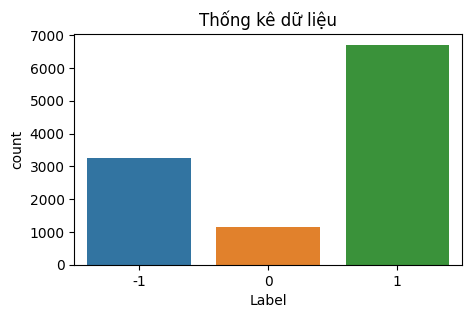

In [102]:
plt.figure(figsize=(5,3))
sb.countplot(data=data, x="Label").set_title('Thống kê dữ liệu')
plt.show()

In [103]:
df_len_comment = data["Preprocess_Review"].apply(lambda text: sentence_len(text))
print('Độ dài trung bình của bình luận trong bộ dữ liệu:', int(np.mean(df_len_headline)), 'từ')

Độ dài trung bình của bình luận trong bộ dữ liệu: 69 từ


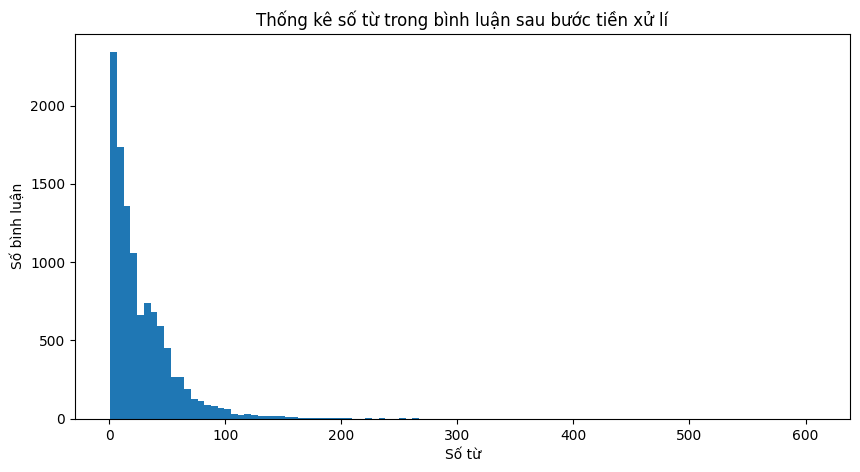

In [104]:
plt.figure(figsize=(10, 5))
plt.title("Thống kê số từ trong bình luận sau bước tiền xử lí")
plt.xlabel('Số từ')
plt.ylabel('Số bình luận')
plt.hist(np.array(df_len_comment), bins=int(math.sqrt(len(df_len_comment))));